# **Тестовое задание Цифровой двойник**

## Загрузка данных

In [105]:
import pandas as pd
data = pd.read_csv('CityDataTest.csv', delimiter=';')
data.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,"15,400.000","15,100.000","15,700.000"
1,Белокуриха,2001,NaN,"15,400.000","15,100.000","15,700.000"
2,Белокуриха,2002,NaN,"15,400.000","15,000.000","15,700.000"
3,Белокуриха,2003,NaN,"15,300.000","15,000.000","15,700.000"
4,Белокуриха,2004,NaN,"15,300.000","14,900.000","15,600.000"


## Обзор

In [106]:
# Число городов
len(data['Город'].unique())

248

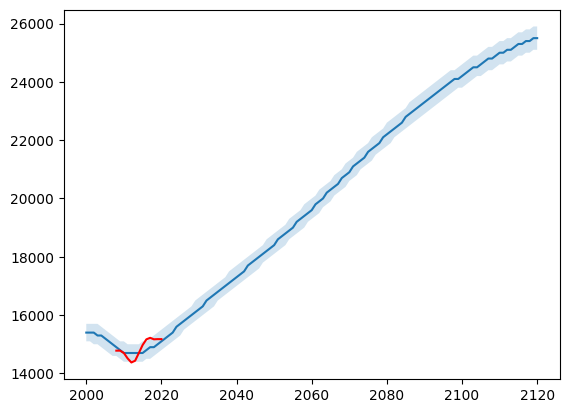

In [107]:
import matplotlib.pyplot as plt
plt.plot(data[data['Город'] == 'Белокуриха']['year'], data[data['Город'] == 'Белокуриха']['Модель'])
plt.plot(data[data['Город'] == 'Белокуриха']['year'], data[data['Город'] == 'Белокуриха']['fact'], color='red')
plt.fill_between(data[data['Город'] == 'Белокуриха']['year'], data[data['Город'] == 'Белокуриха']['Нижняя граница'], data[data['Город'] == 'Белокуриха']['Верхняя граница'], alpha=0.2)

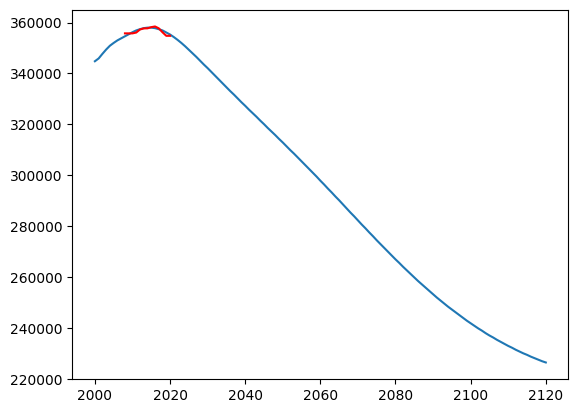

In [108]:
plt.plot(data[data['Город'] == 'Архангельск']['year'], data[data['Город'] == 'Архангельск']['Модель'])
plt.plot(data[data['Город'] == 'Архангельск']['year'], data[data['Город'] == 'Архангельск']['fact'], color='red')

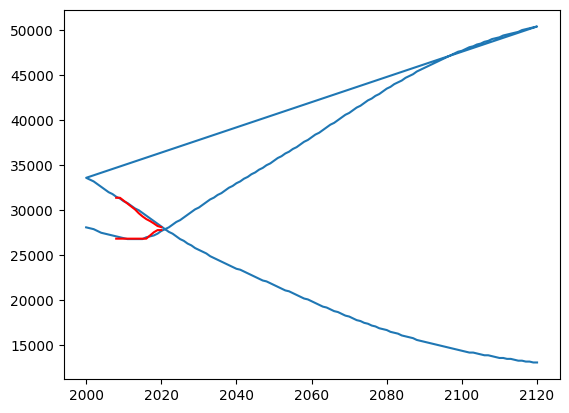

In [109]:
plt.plot(data[data['Город'] == 'Кировск']['year'], data[data['Город'] == 'Кировск']['Модель'])
plt.plot(data[data['Город'] == 'Кировск']['year'], data[data['Город'] == 'Кировск']['fact'], color='red')

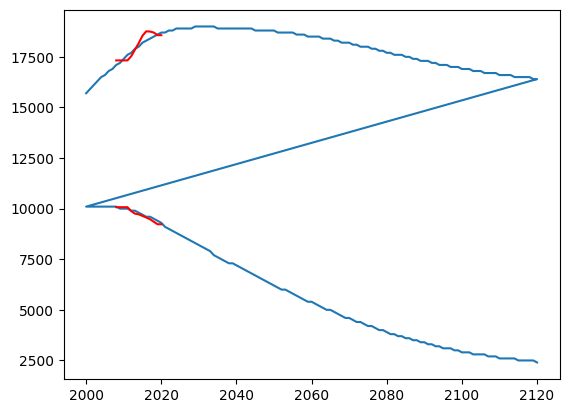

In [110]:
plt.plot(data[data['Город'] == 'Краснослободск']['year'], data[data['Город'] == 'Краснослободск']['Модель'])
plt.plot(data[data['Город'] == 'Краснослободск']['year'], data[data['Город'] == 'Краснослободск']['fact'], color='red')

## Очистка данных
Найдены повторяющиеся временные ряды по городам Краснослободск и Кировск.

В некоторых названиях городов были пробелы в начале строки.

In [111]:
data['Город'] = data['Город'].str.strip()
data.sort_values(by=['Город', 'year'], inplace=True)
data.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
29161,Абаза,2000,NaN,"16,700.000","16,400.000","16,900.000"
29162,Абаза,2001,NaN,"16,700.000","16,400.000","16,900.000"
29163,Абаза,2002,NaN,"16,700.000","16,500.000","16,900.000"
29164,Абаза,2003,NaN,"16,700.000","16,500.000","17,000.000"
29165,Абаза,2004,NaN,"16,800.000","16,600.000","17,000.000"


In [112]:
data.drop_duplicates(subset=['Город', 'year'], inplace=True)
data.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
29161,Абаза,2000,NaN,"16,700.000","16,400.000","16,900.000"
29162,Абаза,2001,NaN,"16,700.000","16,400.000","16,900.000"
29163,Абаза,2002,NaN,"16,700.000","16,500.000","16,900.000"
29164,Абаза,2003,NaN,"16,700.000","16,500.000","17,000.000"
29165,Абаза,2004,NaN,"16,800.000","16,600.000","17,000.000"


## Подготовка данных

In [113]:
# Словарь с кодами субъектов РФ
city_to_region = {
    'Буй': 44, 'Оха': 65, 'Реж': 66, 'Уфа': 2, 'Шуя': 37, 'Абаза': 19, 'Агидель': 2,
    'Алатырь': 21, 'Александровск-Сахалинский': 65, 'Алексин': 71, 'Алзамай': 38,
    'Алушта': 91, 'Анадырь': 87, 'Анапа': 23, 'Ангарск': 38, 'Арзамас': 52, 'Архангельск': 29,
    'Бабаево': 35, 'Барабинск': 54, 'Барыш': 73, 'Белогорск': 28, 'Белокуриха': 22,
    'Березовский': 66, 'Бирюч': 31, 'Бобров': 36, 'Бодайбо': 38, 'Бокситогорск': 47,
    'Болохово': 71, 'Большой Камень': 25, 'Бородино': 24, 'Бузулук': 56, 'Буйнакск': 5,
    'Бутурлиновка': 36, 'Великий Новгород': 53, 'Верхний Тагил': 66, 'Ветлуга': 52,
    'Вихоревка': 38, 'Волгодонск': 61, 'Волгореченск': 44, 'Волжск': 12, 'Володарск': 52,
    'Волхов': 47, 'Воркута': 11, 'Всеволожск': 47, 'Вуктыл': 11, 'Вытегра': 35,
    'Гаврилов Посад': 37, 'Глазов': 18, 'Городец': 52, 'Городовиковск': 8,
    'Гороховец': 33, 'Грязи': 48, 'Губаха': 59, 'Губкинский': 89, 'Гудермес': 20, 'Гусев': 39,
    'Гусь-Хрустальный': 33, 'Десногорск': 67, 'Джанкой': 82, 'Дзержинск': 52, 'Дигора': 15,
    'Дмитриев': 46, 'Долинск': 65, 'Евпатория': 91, 'Егорьевск': 50, 'Елец': 48, 'Елизово': 41,
    'Ессентуки': 26, 'Ефремов': 71, 'Железногорск': 46, 'Жердевка': 68, 'Завитинск': 28,
    'Заволжск': 37, 'Зеленоградск': 39, 'Иваново': 37, 'Инта': 11, 'Ирбит': 66, 'Ишим': 72,
    'Калач': 36, 'Калач-на-Дону': 34, 'Калининск': 64, 'Камбарка': 18,
    'Каменск-Уральский': 66, 'Каменск-Шахтинский': 61, 'Камышин': 34, 'Камышлов': 66,
    'Карабаново': 33, 'Карабулак': 6, 'Карасук': 54, 'Карачаевск': 9, 'Каспийск': 5,
    'Катайск': 45, 'Кашира': 50, 'Кемь': 10, 'Керчь': 91, 'Кизилюрт': 5, 'Кимры': 69,
    'Кинель': 63, 'Киржач': 33, 'Кировград': 66, 'Кировск': 47, 'Клинцы': 32, 'Козельск': 40, 'Кола': 51, 'Коломна': 50, 'Корсаков': 65,
    'Костерево': 33, 'Котельнич': 43, 'Кохма': 37, 'Красавино': 35, 'Краснодар': 23,
    'Краснокаменск': 75, 'Краснослободск': 13, 'Красноуфимск': 66, 'Красный Кут': 64,
    'Кстово': 52, 'Кулебаки': 52, 'Курлово': 33, 'Куртамыш': 45, 'Кызыл': 17, 'Ладушкин': 39,
    'Лахденпохья': 10, 'Ленинск-Кузнецкий': 42, 'Лермонтов': 26, 'Липки': 71, 'Лиски': 36,
    'Лысьва': 59, 'Лянтор': 86, 'Магас': 6, 'Магнитогорск': 74, 'Мглин': 32,
    'Медвежьегорск': 10, 'Медногорск': 56, 'Медынь': 40, 'Мещовск': 40, 'Миасс': 74,
    'Мирный': 14, 'Михайловка': 34, 'Могоча': 75, 'Москва': 77, 'Муравленко': 89,
    'Набережные Челны': 16, 'Навашино': 52, 'Наволоки': 37, 'Назрань': 6,
    'Называевск': 55, 'Невинномысск': 26, 'Неман': 39, 'Нефтекамск': 2,
    'Нижние Серги': 66, 'Нижняя Салда': 66, 'Николаевск-на-Амуре': 27, 'Никольск': 43,
    'Новая Ладога': 47, 'Новоалтайск': 22, 'Новоаннинский': 34, 'Новодвинск': 29,
    'Новокуйбышевск': 63, 'Новотроицк': 56, 'Новохопёрск': 36, 'Новочебоксарск': 21,
    'Новочеркасск': 61, 'Новошахтинск': 61, 'Нягань': 86, 'Облучье': 79, 'Октябрьский': 2,
    'Оренбург': 56, 'Отрадное': 47, 'Отрадный': 63, 'Павловск': 36, 'Партизанск': 25,
    'Пенза': 58, 'Переславль-Залесский': 76, 'Петропавловск-Камчатский': 41,
    'Петушки': 33, 'Плес': 37, 'Покров': 33, 'Полевской': 66, 'Полысаево': 42, 'Почеп': 32,
    'Приволжск': 37, 'Пучеж': 37, 'Пущино': 50, 'Райчихинск': 28, 'Реутов': 50, 'Ртищево': 64,
    'Рыльск': 46, 'Саранск': 13, 'Сарапул': 18, 'Саяногорск': 19, 'Саянск': 38, 'Светлый': 39,
    'Светогорск': 47, 'Семилуки': 36, 'Серафимович': 34, 'Сергач': 52, 'Сертолово': 47,
    'Слободской': 43, 'Советск': 43, 'Сокол': 35, 'Соликамск': 59, 'Сольвычегодск': 29,
    'Сортавала': 10, 'Спасск': 25, 'Среднеуральск': 66, 'Старый Крым': 91, 'Сунжа': 6,
    'Сурск': 58, 'Сызрань': 63, 'Сысерть': 66, 'Таганрог': 61, 'Тара': 55, 'Тобольск': 72,
    'Тольятти': 63, 'Томск': 70, 'Тотьма': 35, 'Туринск': 66, 'Тюкалинск': 55, 'Уварово': 68,
    'Удомля': 69, 'Узловая': 71, 'Ульяновск': 73, 'Урюпинск': 34, 'Усть-Джегута': 9,
    'Усть-Илимск': 38, 'Усть-Катав': 74, 'Фролово': 34, 'Фурманов': 37, 'Химки': 50,
    'Холмск': 65, 'Чебоксары': 21, 'Черкесск': 9, 'Чулым': 54, 'Шарыпово': 24,
    'Шимановск': 28, 'Шлиссельбург': 47, 'Щекино': 71, 'Щигры': 46, 'Электрогорск': 50,
    'Электросталь': 50, 'Югорск': 86, 'Юрьев-Польский': 33, 'Юхнов': 40, 'Якутск': 14,
    'Ялта': 91, 'Ялуторовск': 72, 'Ярославль': 76, 'Ясногорск': 71
}
# Словарь с названиями субъектов РФ
city_to_subject = {
    'Буй': 'Костромская область', 'Оха': 'Сахалинская область', 'Реж': 'Свердловская область', 'Уфа': 'Республика Башкортостан', 'Шуя': 'Ивановская область',
    'Абаза': 'Республика Хакасия', 'Агидель': 'Республика Башкортостан', 'Алатырь': 'Чувашская Республика', 'Александровск-Сахалинский': 'Сахалинская область', 'Алексин': 'Тульская область',
    'Алзамай': 'Иркутская область', 'Алушта': 'Республика Крым', 'Анадырь': 'Чукотский автономный округ', 'Анапа': 'Краснодарский край', 'Ангарск': 'Иркутская область',
    'Арзамас': 'Нижегородская область', 'Архангельск': 'Архангельская область', 'Бабаево': 'Вологодская область', 'Барабинск': 'Новосибирская область', 'Барыш': 'Ульяновская область',
    'Белогорск': 'Амурская область', 'Белокуриха': 'Алтайский край', 'Березовский': 'Кемеровская область', 'Бирюч': 'Белгородская область', 'Бобров': 'Воронежская область',
    'Бодайбо': 'Иркутская область', 'Бокситогорск': 'Ленинградская область', 'Болохово': 'Тульская область', 'Большой Камень': 'Приморский край', 'Бородино': 'Красноярский край',
    'Бузулук': 'Оренбургская область', 'Буйнакск': 'Республика Дагестан', 'Бутурлиновка': 'Воронежская область', 'Великий Новгород': 'Новгородская область', 'Верхний Тагил': 'Свердловская область',
    'Ветлуга': 'Нижегородская область', 'Вихоревка': 'Иркутская область', 'Волгодонск': 'Ростовская область', 'Волгореченск': 'Костромская область', 'Волжск': 'Республика Марий Эл',
    'Володарск': 'Нижегородская область', 'Волхов': 'Ленинградская область', 'Воркута': 'Республика Коми', 'Всеволожск': 'Ленинградская область', 'Вуктыл': 'Республика Коми',
    'Вытегра': 'Вологодская область', 'Гаврилов Посад': 'Ивановская область', 'Глазов': 'Удмуртская Республика', 'Городец': 'Нижегородская область', 'Городовиковск': 'Республика Калмыкия',
    'Гороховец': 'Владимирская область', 'Грязи': 'Липецкая область', 'Губаха': 'Пермский край', 'Губкинский': 'Ямало-Ненецкий автономный округ', 'Гудермес': 'Чеченская Республика',
    'Гусев': 'Калининградская область', 'Гусь-Хрустальный': 'Владимирская область', 'Десногорск': 'Смоленская область', 'Джанкой': 'Республика Крым', 'Дзержинск': 'Нижегородская область',
    'Дигора': 'Республика Северная Осетия — Алания', 'Дмитриев': 'Курская область', 'Долинск': 'Сахалинская область', 'Евпатория': 'Республика Крым', 'Егорьевск': 'Московская область',
    'Елец': 'Липецкая область', 'Елизово': 'Камчатский край', 'Ессентуки': 'Ставропольский край', 'Ефремов': 'Тульская область', 'Железногорск': 'Красноярский край',
    'Жердевка': 'Тамбовская область', 'Завитинск': 'Амурская область', 'Заволжск': 'Ивановская область', 'Зеленоградск': 'Калининградская область', 'Иваново': 'Ивановская область',
    'Инта': 'Республика Коми', 'Ирбит': 'Свердловская область', 'Ишим': 'Тюменская область', 'Калач': 'Воронежская область', 'Калач-на-Дону': 'Волгоградская область',
    'Калининск': 'Саратовская область', 'Камбарка': 'Удмуртская Республика', 'Каменск-Уральский': 'Свердловская область', 'Каменск-Шахтинский': 'Ростовская область', 'Камышин': 'Волгоградская область',
    'Камышлов': 'Свердловская область', 'Карабаново': 'Владимирская область', 'Карабулак': 'Республика Ингушетия', 'Карасук': 'Новосибирская область', 'Карачаевск': 'Карачаево-Черкесская Республика',
    'Каспийск': 'Республика Дагестан', 'Катайск': 'Курганская область', 'Кашира': 'Московская область', 'Кемь': 'Республика Карелия', 'Керчь': 'Республика Крым',
    'Кизилюрт': 'Республика Дагестан', 'Кимры': 'Тверская область', 'Кинель': 'Самарская область', 'Киржач': 'Владимирская область', 'Кировград': 'Свердловская область',
    'Кировск': 'Ленинградская область', 'Клинцы': 'Брянская область', 'Козельск': 'Калужская область', 'Кола': 'Мурманская область', 'Коломна': 'Московская область',
    'Корсаков': 'Сахалинская область', 'Костерево': 'Владимирская область', 'Котельнич': 'Кировская область', 'Кохма': 'Ивановская область', 'Красавино': 'Вологодская область',
    'Краснодар': 'Краснодарский край', 'Краснокаменск': 'Забайкальский край', 'Краснослободск': 'Республика Мордовия', 'Красноуфимск': 'Свердловская область', 'Красный Кут': 'Саратовская область',
    'Кстово': 'Нижегородская область', 'Кулебаки': 'Нижегородская область', 'Курлово': 'Владимирская область', 'Куртамыш': 'Курганская область', 'Кызыл': 'Республика Тыва',
    'Ладушкин': 'Калининградская область', 'Лахденпохья': 'Республика Карелия', 'Ленинск-Кузнецкий': 'Кемеровская область', 'Лермонтов': 'Ставропольский край', 'Липки': 'Тульская область',
    'Лиски': 'Воронежская область', 'Лысьва': 'Пермский край', 'Лянтор': 'Ханты-Мансийский автономный округ', 'Магас': 'Республика Ингушетия', 'Магнитогорск': 'Челябинская область',
    'Мглин': 'Брянская область', 'Медвежьегорск': 'Республика Карелия', 'Медногорск': 'Оренбургская область', 'Медынь': 'Калужская область', 'Мещовск': 'Калужская область',
    'Миасс': 'Челябинская область', 'Мирный': 'Архангельская область', 'Михайловка': 'Волгоградская область', 'Могоча': 'Забайкальский край', 'Москва': 'Москва',
    'Муравленко': 'Ямало-Ненецкий автономный округ', 'Набережные Челны': 'Республика Татарстан', 'Навашино': 'Нижегородская область', 'Наволоки': 'Ивановская область', 'Назрань': 'Республика Ингушетия',
    'Называевск': 'Омская область', 'Невинномысск': 'Ставропольский край', 'Неман': 'Калининградская область', 'Нефтекамск': 'Республика Башкортостан', 'Нижние Серги': 'Свердловская область',
    'Нижняя Салда': 'Свердловская область', 'Николаевск-на-Амуре': 'Хабаровский край', 'Никольск': 'Вологодская область', 'Новая Ладога': 'Ленинградская область', 'Новоалтайск': 'Алтайский край',
    'Новоаннинский': 'Волгоградская область', 'Новодвинск': 'Архангельская область', 'Новокуйбышевск': 'Самарская область', 'Новотроицк': 'Оренбургская область', 'Новохопёрск': 'Воронежская область',
    'Новочебоксарск': 'Чувашская Республика', 'Новочеркасск': 'Ростовская область', 'Новошахтинск': 'Ростовская область', 'Нягань': 'Ханты-Мансийский автономный округ', 'Облучье': 'Еврейская автономная область',
    'Октябрьский': 'Республика Башкортостан', 'Оренбург': 'Оренбургская область', 'Отрадное': 'Ленинградская область', 'Отрадный': 'Самарская область', 'Павловск': 'Воронежская область',
    'Партизанск': 'Приморский край', 'Пенза': 'Пензенская область', 'Переславль-Залесский': 'Ярославская область', 'Петропавловск-Камчатский': 'Камчатский край', 'Петушки': 'Владимирская область',
    'Плес': 'Ивановская область', 'Покров': 'Владимирская область', 'Полевской': 'Свердловская область', 'Полысаево': 'Кемеровская область', 'Почеп': 'Брянская область',
    'Приволжск': 'Ивановская область', 'Пучеж': 'Ивановская область', 'Пущино': 'Московская область', 'Райчихинск': 'Амурская область', 'Реутов': 'Московская область',
    'Ртищево': 'Саратовская область', 'Рыльск': 'Курская область', 'Саранск': 'Республика Мордовия', 'Сарапул': 'Удмуртская Республика', 'Саяногорск': 'Республика Хакасия',
    'Саянск': 'Иркутская область', 'Светлый': 'Калининградская область', 'Светогорск': 'Ленинградская область', 'Семилуки': 'Воронежская область', 'Серафимович': 'Волгоградская область',
    'Сергач': 'Нижегородская область', 'Сертолово': 'Ленинградская область', 'Слободской': 'Кировская область', 'Советск': 'Калининградская область', 'Сокол': 'Вологодская область',
    'Соликамск': 'Пермский край', 'Сольвычегодск': 'Архангельская область', 'Сортавала': 'Республика Карелия', 'Спасск': 'Пензенская область', 'Среднеуральск': 'Свердловская область',
    'Старый Крым': 'Республика Крым', 'Сунжа': 'Республика Ингушетия', 'Сурск': 'Пензенская область', 'Сызрань': 'Самарская область', 'Сысерть': 'Свердловская область',
    'Таганрог': 'Ростовская область', 'Тара': 'Омская область', 'Тобольск': 'Тюменская область', 'Тольятти': 'Самарская область', 'Томск': 'Томская область',
    'Тотьма': 'Вологодская область', 'Туринск': 'Свердловская область', 'Тюкалинск': 'Омская область', 'Уварово': 'Тамбовская область', 'Удомля': 'Тверская область',
    'Узловая': 'Тульская область', 'Ульяновск': 'Ульяновская область', 'Урюпинск': 'Волгоградская область', 'Усть-Джегута': 'Карачаево-Черкесская Республика', 'Усть-Илимск': 'Иркутская область',
    'Усть-Катав': 'Челябинская область', 'Фролово': 'Волгоградская область', 'Фурманов': 'Ивановская область', 'Химки': 'Московская область', 'Холмск': 'Сахалинская область',
    'Чебоксары': 'Чувашская Республика', 'Черкесск': 'Карачаево-Черкесская Республика', 'Чулым': 'Новосибирская область', 'Шарыпово': 'Красноярский край', 'Шимановск': 'Амурская область',
    'Шлиссельбург': 'Ленинградская область', 'Щекино': 'Тульская область', 'Щигры': 'Курская область', 'Электрогорск': 'Московская область', 'Электросталь': 'Московская область',
    'Югорск': 'Ханты-Мансийский автономный округ', 'Юрьев-Польский': 'Владимирская область', 'Юхнов': 'Калужская область', 'Якутск': 'Республика Саха (Якутия)', 'Ялта': 'Республика Крым',
    'Ялуторовск': 'Тюменская область', 'Ярославль': 'Ярославская область', 'Ясногорск': 'Тульская область'
}

# функция проставления ранга города
def city_rang(value):
    if value < 50000:
        return 'малый'
    elif 50000 <= value < 100000:
        return 'средний'
    elif 100000 <= value < 250000:
        return 'большой'
    elif 250000 <= value < 1000000:
        return 'крупный'
    elif value >= 1000000:
        return 'крупнейший'

In [114]:
# Присвоение кодов субъектов РФ городам
data['Код субъекта РФ'] = data['Город'].map(city_to_region)
data['Ранг города'] = data['fact'].apply(city_rang)
data['Название субъекта РФ'] = data['Город'].map(city_to_subject)
data.head(120)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Код субъекта РФ,Ранг города,Название субъекта РФ
29161,Абаза,2000,NaN,"16,700.000","16,400.000","16,900.000",19,None,Республика Хакасия
29162,Абаза,2001,NaN,"16,700.000","16,400.000","16,900.000",19,None,Республика Хакасия
29163,Абаза,2002,NaN,"16,700.000","16,500.000","16,900.000",19,None,Республика Хакасия
29164,Абаза,2003,NaN,"16,700.000","16,500.000","17,000.000",19,None,Республика Хакасия
29165,Абаза,2004,NaN,"16,800.000","16,600.000","17,000.000",19,None,Республика Хакасия
...,...,...,...,...,...,...,...,...,...
29276,Абаза,2115,NaN,"1,900.000","1,600.000","2,200.000",19,None,Республика Хакасия
29277,Абаза,2116,NaN,"1,800.000","1,600.000","2,200.000",19,None,Республика Хакасия
29278,Абаза,2117,NaN,"1,800.000","1,600.000","2,100.000",19,None,Республика Хакасия
29279,Абаза,2118,NaN,"1,800.000","1,500.000","2,100.000",19,None,Республика Хакасия


Фактическое суммарное население в указанных городах растёт. По мнению модели, рост тоже будет продолжаться.

(2008.0, 2020.0)

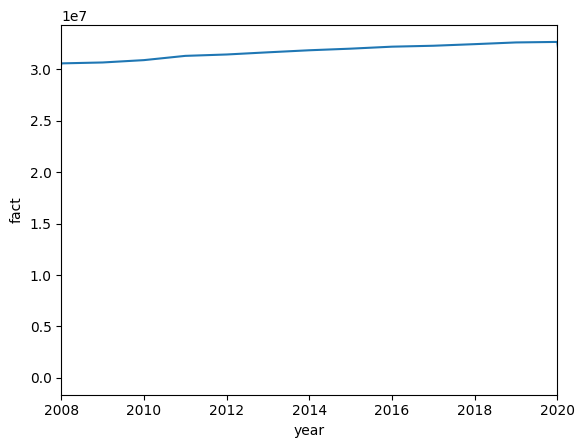

In [116]:
import seaborn as sns
sns.lineplot(data.groupby('year')['fact'].sum())
plt.xlim(2008, 2020)

<Axes: xlabel='year', ylabel='Модель'>

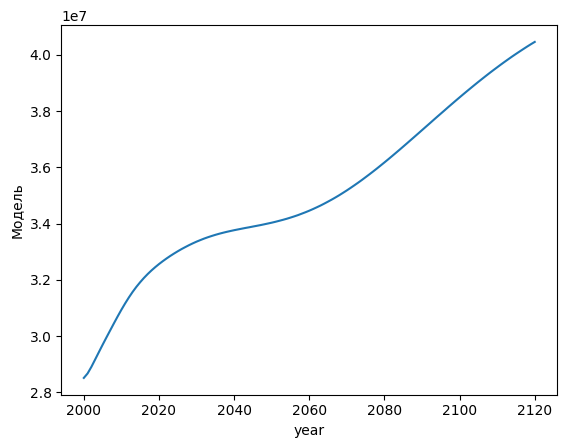

In [117]:
import seaborn as sns
sns.lineplot(data.groupby('year')['Модель'].sum())

In [118]:
data['lagged_values'] = data.groupby(['Город'])['fact'].shift(1)
data['lag_fact_difference'] = data['fact'] - data['lagged_values']
data[~data['fact'].isnull()].head(120)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Код субъекта РФ,Ранг города,Название субъекта РФ,lagged_values,lag_fact_difference
29169,Абаза,2008,"16,938.000","16,900.000","16,700.000","17,100.000",19,малый,Республика Хакасия,NaN,NaN
29170,Абаза,2009,"16,938.000","16,900.000","16,700.000","17,100.000",19,малый,Республика Хакасия,"16,938.000",0.000
29171,Абаза,2010,"17,157.000","16,900.000","16,600.000","17,100.000",19,малый,Республика Хакасия,"16,938.000",219.000
29172,Абаза,2011,"16,874.000","16,800.000","16,600.000","17,000.000",19,малый,Республика Хакасия,"17,157.000",-283.000
29173,Абаза,2012,"16,599.000","16,700.000","16,500.000","16,900.000",19,малый,Республика Хакасия,"16,874.000",-275.000
...,...,...,...,...,...,...,...,...,...,...,...
382,Анапа,2019,"199,851.000","191,300.000","187,200.000","195,500.000",23,большой,Краснодарский край,"190,054.000","9,797.000"
383,Анапа,2020,"199,851.000","196,900.000","192,900.000","201,100.000",23,большой,Краснодарский край,"199,851.000",0.000
9083,Ангарск,2008,"239,225.000","239,300.000","239,000.000","239,700.000",38,большой,Иркутская область,NaN,NaN
9084,Ангарск,2009,"239,225.000","239,400.000","239,100.000","239,800.000",38,большой,Иркутская область,"239,225.000",0.000


Изменение фактического населения с 2008 по 2020 год для каждого города.
Города из которых больше всего уехало человек:
1) Воркута - Республика Коми
2) Тольятти - Самарская область
3) Новоторицк - Оренбургская область
4) Усть-Илимск - Иркутская область
5) Дзержинск - Нижегородская область

Города, у которых % уменьшения населения был наиболее высоким.
1) Воркута - Республика Коми
2) Инта - Республика Коми
3) Александровск-Сахалинский
4) Николаевск на Амуре - Сахалинская область
5) Оха - Сахалинская область

Города, в которые больше всего приехало человек:
1) Москва - Москва
2) Краснодар - Краснодарский край
3) Уфа - Республика Башкортостан
4) Химки - Московская обл
5) Якустк - Республика Саха (Якутия)


Города, у которых % увеличения населения был наиболее высоким.
1) Магас - Республика Ингушетия	
2) Анапа - Краснодарский край
3) Михайловка - Волгоградская обл
4) Карабулак - Республика Ингушетия	
5) Химки - Московская обл


In [119]:
fact_difference = data[data['year'] == 2020][['Город', 'fact']].set_index('Город') - data[data['year'] == 2008][['Город', 'fact']].set_index('Город')
fact_difference.reset_index(inplace=True)
fact_difference['Название субъекта РФ'] = fact_difference['Город'].map(city_to_subject)
fact_difference.sort_values(by='fact').head(10)

,Город,fact,Название субъекта РФ
38,Воркута,"-39,210.000",Республика Коми
211,Тольятти,"-19,919.000",Самарская область
154,Новотроицк,"-19,835.000",Оренбургская область
222,Усть-Илимск,"-15,949.000",Иркутская область
55,Дзержинск,"-14,440.000",Нижегородская область
71,Инта,"-12,529.000",Республика Коми
206,Сызрань,"-10,887.000",Самарская область
118,Ленинск-Кузнецкий,"-10,032.000",Кемеровская область
208,Таганрог,"-9,870.000",Ростовская область
153,Новокуйбышевск,"-9,679.000",Самарская область


In [120]:
fact_difference.sort_values(by='fact', ascending=False).head(10)

,Город,fact,Название субъекта РФ
135,Москва,"1,491,228.000",Москва
106,Краснодар,"232,449.000",Краснодарский край
224,Уфа,"103,829.000",Республика Башкортостан
227,Химки,"69,746.000",Московская область
243,Якутск,"66,602.000",Республика Саха (Якутия)
8,Анапа,"58,746.000",Краснодарский край
229,Чебоксары,"52,506.000",Чувашская Республика
162,Оренбург,"46,967.000",Оренбургская область
212,Томск,"39,750.000",Томская область
100,Коломна,"35,552.000",Московская область


In [121]:
fact_difference['Прирост населения, %'] = fact_difference['fact'] / data[(~data['fact'].isnull()) & (data['year'] == 2008)]['fact'].reset_index(drop=True)*100
fact_difference.sort_values(by='Прирост населения, %').head()

,Город,fact,Название субъекта РФ,"Прирост населения, %"
38,Воркута,"-39,210.000",Республика Коми,-35.014
71,Инта,"-12,529.000",Республика Коми,-32.053
3,Александровск-Сахалинский,"-4,273.000",Сахалинская область,-28.409
147,Николаевск-на-Амуре,"-7,152.000",Хабаровский край,-28.380
165,Оха,"-8,101.000",Сахалинская область,-26.891


In [122]:
fact_difference.sort_values(by='Прирост населения, %', ascending=False).head()

,Город,fact,Название субъекта РФ,"Прирост населения, %"
124,Магас,"3,864.000",Республика Ингушетия,87.204
8,Анапа,"58,746.000",Краснодарский край,41.633
133,Михайловка,"23,785.000",Волгоградская область,37.750
83,Карабулак,"11,531.000",Республика Ингушетия,37.725
227,Химки,"69,746.000",Московская область,37.217


In [123]:
fact_difference['Ранг города'] = data[(~data['fact'].isnull()) & (data['year'] == 2008)]['Ранг города'].reset_index(drop=True)
fact_difference.head()

,Город,fact,Название субъекта РФ,"Прирост населения, %",Ранг города
0,Абаза,"-2,035.000",Республика Хакасия,-12.014,малый
1,Агидель,"-5,106.000",Республика Башкортостан,-26.617,малый
2,Алатырь,"-8,581.000",Чувашская Республика,-20.443,малый
3,Александровск-Сахалинский,"-4,273.000",Сахалинская область,-28.409,малый
4,Алексин,"-1,217.000",Тульская область,-1.785,средний


In [124]:
fact_difference['Код субъекта РФ'] = fact_difference['Город'].map(city_to_region)
fact_difference.head(10)

,Город,fact,Название субъекта РФ,"Прирост населения, %",Ранг города,Код субъекта РФ
0,Абаза,"-2,035.000",Республика Хакасия,-12.014,малый,19
1,Агидель,"-5,106.000",Республика Башкортостан,-26.617,малый,2
2,Алатырь,"-8,581.000",Чувашская Республика,-20.443,малый,21
3,Александровск-Сахалинский,"-4,273.000",Сахалинская область,-28.409,малый,65
4,Алексин,"-1,217.000",Тульская область,-1.785,средний,71
5,Алзамай,-980.000,Иркутская область,-14.497,малый,38
6,Алушта,"2,045.000",Республика Крым,3.854,средний,91
7,Анадырь,"2,239.000",Чукотский автономный округ,16.259,малый,87
8,Анапа,"58,746.000",Краснодарский край,41.633,большой,23
9,Ангарск,"-1,912.000",Иркутская область,-0.799,большой,38


Число городов в каждом субъекте.

Имеем неравномерную информацию по субъектам.

In [125]:
pd.set_option('display.max_rows', None)
fact_difference.groupby('Название субъекта РФ')['Город'].count().sort_values(ascending=False)

Название субъекта РФ
Свердловская область                   13
Ивановская область                     10
Нижегородская область                   9
Ленинградская область                   9
Владимирская область                    9
Московская область                      8
Воронежская область                     7
Тульская область                        7
Волгоградская область                   7
Республика Крым                         6
Вологодская область                     6
Калининградская область                 6
Иркутская область                       6
Сахалинская область                     5
Самарская область                       5
Ростовская область                      5
Архангельская область                   4
Республика Карелия                      4
Республика Ингушетия                    4
Калужская область                       4
Амурская область                        4
Оренбургская область                    4
Республика Башкортостан                 4
Брянская обла

Число городов внутри субъекта, у которых уменьшилось фактическое население в 2008 по 2020 год

In [126]:
fact_difference[fact_difference['fact'] < 0].groupby('Название субъекта РФ')['Город'].count().sort_values(ascending=False)

Название субъекта РФ
Свердловская область               11
Владимирская область                8
Нижегородская область               8
Тульская область                    7
Ивановская область                  7
Вологодская область                 6
Иркутская область                   6
Волгоградская область               6
Сахалинская область                 5
Самарская область                   4
Ленинградская область               4
Архангельская область               4
Ростовская область                  4
Амурская область                    4
Новосибирская область               3
Республика Коми                     3
Брянская область                    3
Калининградская область             3
Республика Карелия                  3
Оренбургская область                3
Удмуртская Республика               3
Кемеровская область                 2
Ярославская область                 2
Тамбовская область                  2
Челябинская область                 2
Липецкая область             

Число городов внутри субъекта, у которых увеличилось фактическое население в 2008 по 2020 год

In [127]:
fact_difference[fact_difference['fact'] > 0].groupby('Название субъекта РФ')['Город'].count().sort_values(ascending=False)

Название субъекта РФ
Московская область                     7
Ленинградская область                  5
Республика Крым                        5
Воронежская область                    5
Республика Ингушетия                   4
Карачаево-Черкесская Республика        3
Республика Башкортостан                3
Ивановская область                     3
Калининградская область                3
Республика Дагестан                    3
Ханты-Мансийский автономный округ      3
Ставропольский край                    2
Республика Мордовия                    2
Алтайский край                         2
Камчатский край                        2
Краснодарский край                     2
Калужская область                      2
Свердловская область                   2
Чувашская Республика                   2
Тюменская область                      2
Москва                                 1
Кемеровская область                    1
Еврейская автономная область           1
Волгоградская область               

In [128]:
fact_difference.set_index('Город', inplace=True)

## Гипотезы

### Имеет ли значение географическое расположение субъектов в изменении численности населения?

In [129]:
population_growth_fact = fact_difference.groupby('Название субъекта РФ')['fact'].sum().sort_values(ascending=False).reset_index().loc[2:, :]
population_growth_fact

,Название субъекта РФ,fact
2,Московская область,"148,415.000"
3,Республика Башкортостан,"114,915.000"
4,Республика Саха (Якутия),"66,602.000"
5,Чувашская Республика,"44,736.000"
6,Томская область,"39,750.000"
7,Республика Ингушетия,"33,530.000"
8,Республика Дагестан,"28,512.000"
9,Республика Мордовия,"26,639.000"
10,Республика Татарстан,"25,963.000"
11,Ульяновская область,"23,343.000"


Text(0.5, 1.0, 'Прирост населения по субъектам РФ (кроме Москвы и Краснодарского края)')

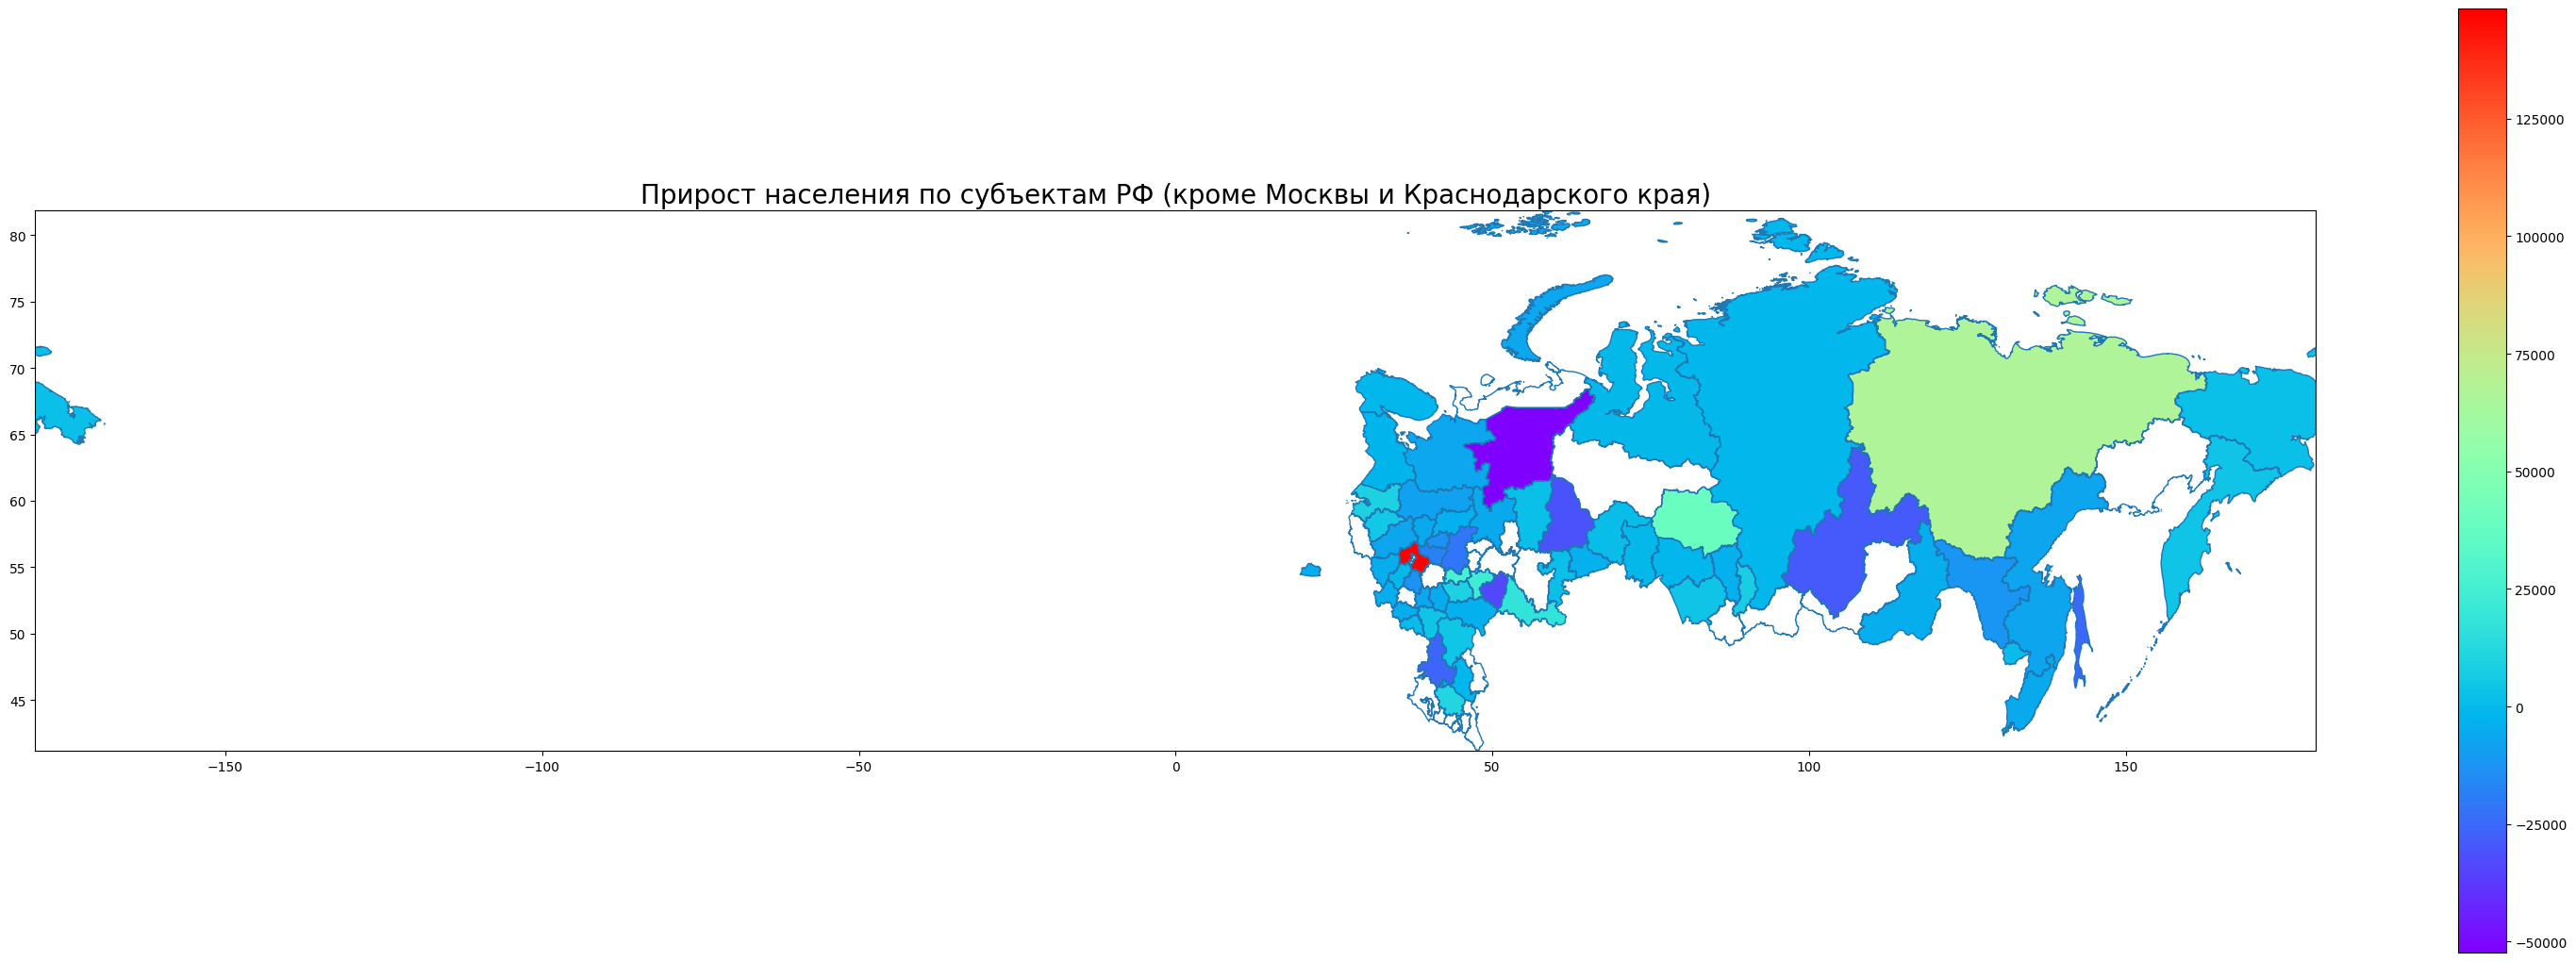

In [130]:
import geopandas as gpd
from matplotlib.colors import Normalize

# Загрузка геоданных субъектов РФ
gdf = gpd.read_file("russia.geojson")

# Объединение геоданных с данными о приросте населения
gdf = gdf.merge(population_growth_fact, left_on='name', right_on='Название субъекта РФ', how='left')


# Создание нормализатора для цветов
norm = Normalize(vmin=gdf['fact'].min(), vmax=gdf['fact'].max())

# Построение карты
fig, ax = plt.subplots(1, 1, figsize=(39, 13))

# Установка ограничений осей для корректного отображения карты
ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2]])
ax.set_ylim([gdf.total_bounds[1], gdf.total_bounds[3]])

# Построение субъектов с цветами
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='fact', cmap='rainbow', linewidth=0, ax=ax, edgecolor='0.8', norm=norm)

# Добавление цветовой шкалы
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

# Добавление заголовка
plt.title('Прирост населения по субъектам РФ (кроме Москвы и Краснодарского края)', fontsize=20)

In [131]:
model_difference = data[data['year'] == 2120][['Город', 'Модель']].set_index('Город') - data[data['year'] == 2000][['Город', 'Модель']].set_index('Город')
model_difference.head(10)

,Модель
Город,
Абаза,"-14,900.000"
Агидель,"13,700.000"
Алатырь,"-20,500.000"
Александровск-Сахалинский,"-9,800.000"
Алексин,"-23,600.000"
Алзамай,"-6,200.000"
Алушта,"37,000.000"
Анадырь,"33,900.000"
Анапа,"620,500.000"


In [132]:
model_difference.reset_index(inplace=True)
model_difference['Код субъекта РФ'] = model_difference['Город'].map(city_to_region)
model_difference['Название субъекта РФ'] = model_difference['Город'].map(city_to_subject)
model_difference.head(10)

,Город,Модель,Код субъекта РФ,Название субъекта РФ
0,Абаза,"-14,900.000",19,Республика Хакасия
1,Агидель,"13,700.000",2,Республика Башкортостан
2,Алатырь,"-20,500.000",21,Чувашская Республика
3,Александровск-Сахалинский,"-9,800.000",65,Сахалинская область
4,Алексин,"-23,600.000",71,Тульская область
5,Алзамай,"-6,200.000",38,Иркутская область
6,Алушта,"37,000.000",91,Республика Крым
7,Анадырь,"33,900.000",87,Чукотский автономный округ
8,Анапа,"620,500.000",23,Краснодарский край
9,Ангарск,"-48,300.000",38,Иркутская область


In [133]:
model_difference[model_difference['Модель'] > 0].groupby('Название субъекта РФ')['Город'].count().sort_values(ascending=False)

Название субъекта РФ
Ленинградская область                  5
Республика Крым                        5
Московская область                     4
Республика Ингушетия                   4
Калининградская область                3
Ханты-Мансийский автономный округ      3
Республика Дагестан                    3
Вологодская область                    3
Свердловская область                   3
Алтайский край                         2
Новосибирская область                  2
Республика Башкортостан                2
Краснодарский край                     2
Воронежская область                    2
Иркутская область                      2
Республика Мордовия                    2
Чувашская Республика                   2
Сахалинская область                    2
Приморский край                        2
Ямало-Ненецкий автономный округ        2
Карачаево-Черкесская Республика        1
Красноярский край                      1
Курская область                        1
Калужская область                   

In [134]:
population_growth_model = model_difference.groupby('Название субъекта РФ')['Модель'].sum().sort_values(ascending=False).reset_index()
population_growth_model

,Название субъекта РФ,Модель
0,Москва,"5,717,300.000"
1,Чеченская Республика,"2,380,300.000"
2,Краснодарский край,"1,847,500.000"
3,Московская область,"1,292,800.000"
4,Республика Ингушетия,"1,165,500.000"
5,Республика Саха (Якутия),"955,300.000"
6,Республика Дагестан,"690,200.000"
7,Пермский край,"341,100.000"
8,Республика Мордовия,"287,900.000"
9,Ленинградская область,"242,900.000"


Text(0.5, 1.0, 'Прирост населения по субъектам РФ')

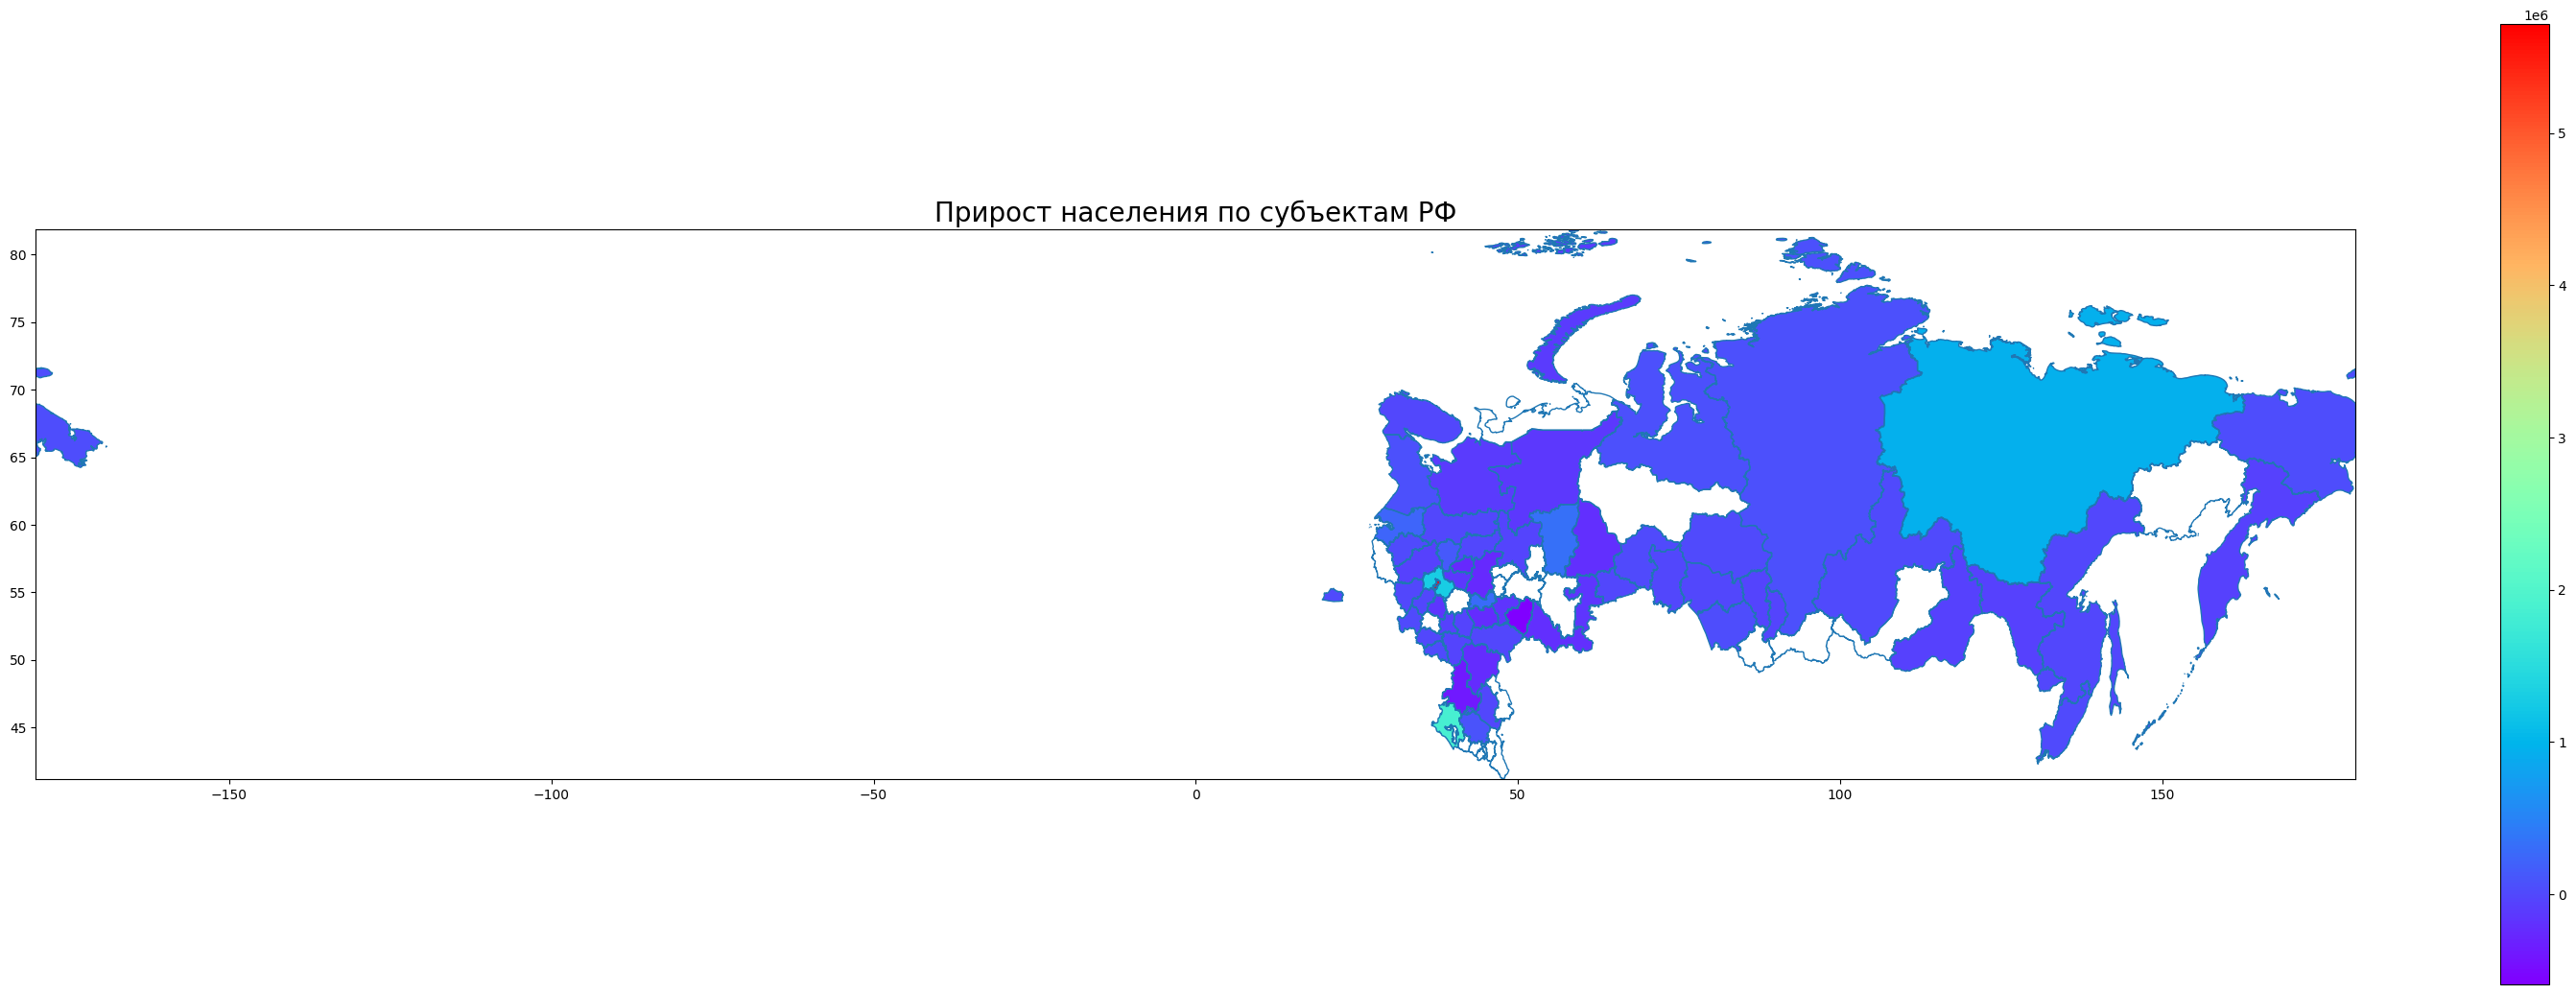

In [135]:
# Загрузка геоданных субъектов РФ
gdf = gpd.read_file("russia.geojson")

# Объединение геоданных с данными о приросте населения
gdf = gdf.merge(population_growth_model, left_on='name', right_on='Название субъекта РФ', how='left')


# Создание нормализатора для цветов
norm = Normalize(vmin=gdf['Модель'].min(), vmax=gdf['Модель'].max())

# Построение карты
fig, ax = plt.subplots(1, 1, figsize=(39, 13))

# Установка ограничений осей для корректного отображения карты
ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2]])
ax.set_ylim([gdf.total_bounds[1], gdf.total_bounds[3]])

# Построение субъектов с цветами
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='Модель', cmap='rainbow', linewidth=0, ax=ax, edgecolor='0.8', norm=norm)

# Добавление цветовой шкалы
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

# Добавление заголовка
plt.title('Прирост населения по субъектам РФ', fontsize=20)

Посмотреть ту же самую статистику, но с учётом доли населения!!!

In [136]:
population_growth_fact = fact_difference.groupby('Название субъекта РФ')['Прирост населения, %'].sum()
population_growth_fact.head()

Название субъекта РФ
Алтайский край            7.937
Амурская область        -52.478
Архангельская область   -23.131
Белгородская область      4.018
Брянская область        -17.425
Name: Прирост населения, %, dtype: float64

Text(0.5, 1.0, 'Прирост населения % по субъектам РФ')

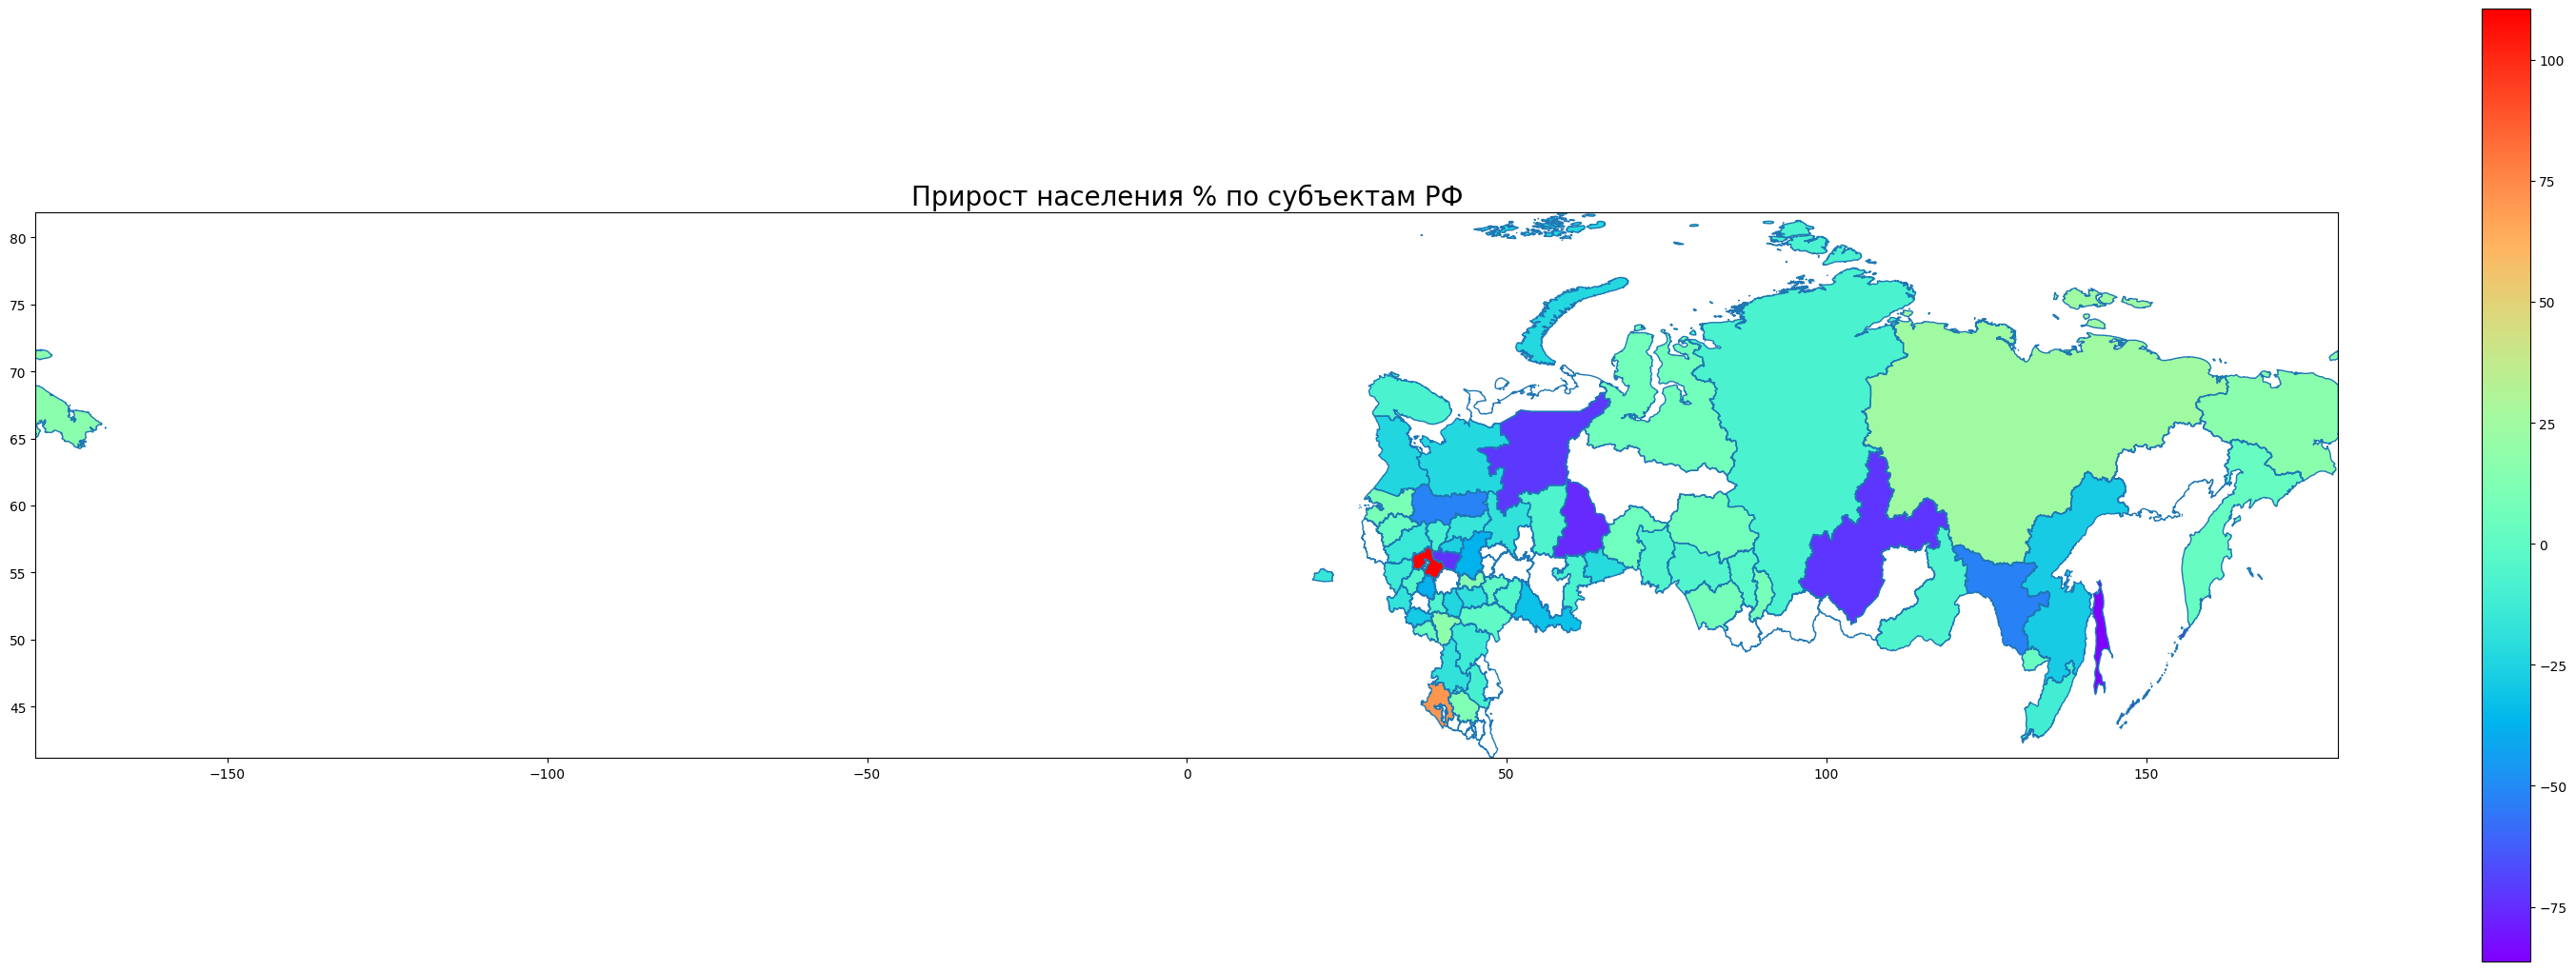

In [137]:
import geopandas as gpd
from matplotlib.colors import Normalize

# Загрузка геоданных субъектов РФ
gdf = gpd.read_file("russia.geojson")

# Объединение геоданных с данными о приросте населения
gdf = gdf.merge(population_growth_fact, left_on='name', right_on='Название субъекта РФ', how='left')


# Создание нормализатора для цветов
norm = Normalize(vmin=gdf['Прирост населения, %'].min(), vmax=gdf['Прирост населения, %'].max())

# Построение карты
fig, ax = plt.subplots(1, 1, figsize=(39, 13))

# Установка ограничений осей для корректного отображения карты
ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2]])
ax.set_ylim([gdf.total_bounds[1], gdf.total_bounds[3]])

# Построение субъектов с цветами
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='Прирост населения, %', cmap='rainbow', linewidth=0, ax=ax, edgecolor='0.8', norm=norm)

# Добавление цветовой шкалы
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

# Добавление заголовка
plt.title('Прирост населения % по субъектам РФ', fontsize=20)

Не выявлено зависимости изменения численности от географического положения. Либо она пока неочевидно, и требуются уточнения


### Чем больше город, тем больше у него прирост населения?

Text(0.5, 1.0, 'Распределение прироста населения в городах, %')

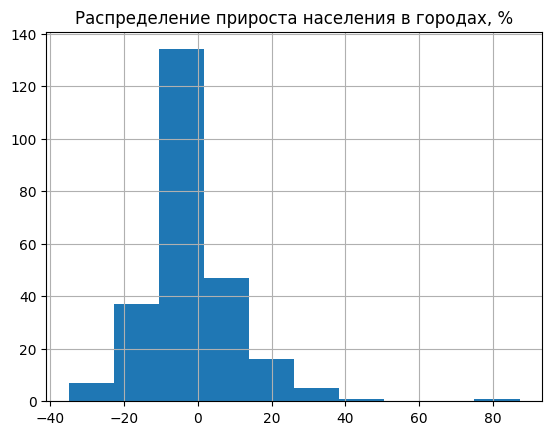

In [138]:
fact_difference['Прирост населения, %'].hist()
plt.title('Распределение прироста населения в городах, %')

Text(0.5, 1.0, 'Распределение прироста населения в городах различных рангов, %')

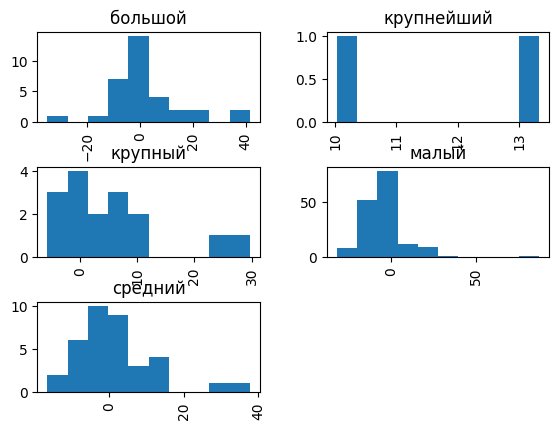

In [139]:
fact_difference.hist(column='Прирост населения, %', by='Ранг города')
plt.title('Распределение прироста населения в городах различных рангов, %')

* В большинестве малых городов население убывает (выброс - Магас вырос на 87%)

* В большинестве средних городов население убывает (выбросы - Михайловка и Реутов выросли на 37% и 29%)

* Во всех крупнейших городах возрастающее население, но сложно делать такой вывод только лишь по двум наблюдениям

* В большинстве крупных городов увеличивается население



In [140]:
fact_difference[fact_difference['Ранг города'] == 'средний'].sort_values(by='Прирост населения, %', ascending=False)

,fact,Название субъекта РФ,"Прирост населения, %",Ранг города,Код субъекта РФ
Город,,,,,
Михайловка,"23,785.000",Волгоградская область,37.750,средний,34
Реутов,"24,371.000",Московская область,29.314,средний,50
Кинель,"7,482.000",Самарская область,14.718,средний,63
Ессентуки,"13,819.000",Ставропольский край,14.108,средний,26
Березовский,"9,277.000",Кемеровская область,13.908,средний,66
Соликамск,"11,382.000",Пермский край,11.765,средний,59
Сертолово,"4,368.000",Ленинградская область,8.457,средний,47
Всеволожск,"5,409.000",Ленинградская область,7.801,средний,47
Новоалтайск,"3,709.000",Алтайский край,5.264,средний,22


### Есть ли массовые пики изменения населения в городах?

Text(0.5, 1.0, 'Прирост населения из года в год в средних городах')

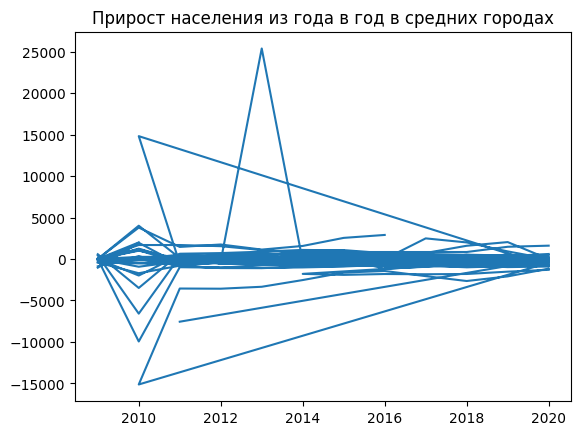

In [141]:
plt.plot(data[data['Ранг города'] == 'средний']['year'], data[data['Ранг города'] == 'средний']['lag_fact_difference'])
plt.title('Прирост населения из года в год в средних городах')

Text(0.5, 1.0, 'Прирост населения из года в год в малых городах')

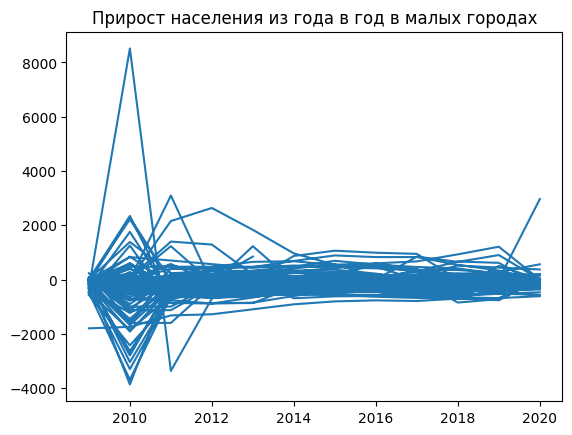

In [142]:
plt.plot(data[data['Ранг города'] == 'малый']['year'], data[data['Ранг города'] == 'малый']['lag_fact_difference'])
plt.title('Прирост населения из года в год в малых городах')

Text(0.5, 1.0, 'Прирост населения из года в год в крупных городах')

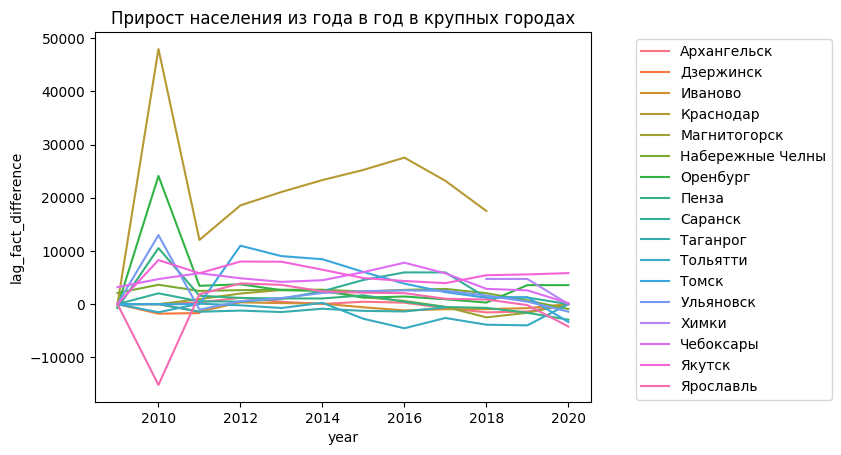

In [143]:
sns.lineplot(x="year", y="lag_fact_difference",
             hue="Город",
             data=data[data['Ранг города'] == 'крупный'])
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.title('Прирост населения из года в год в крупных городах')

Text(0.5, 1.0, 'Прирост населения из года в год в больших городах')

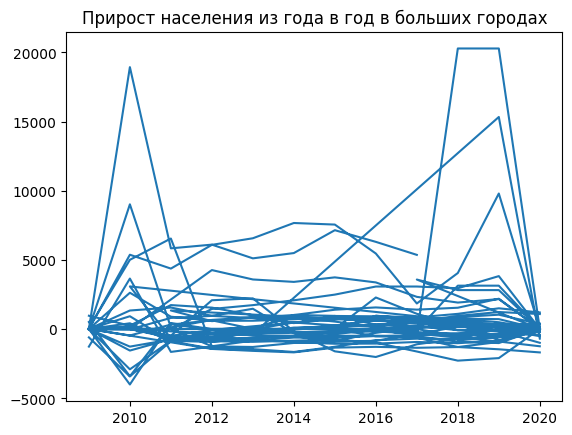

In [144]:
plt.plot(data[data['Ранг города'] == 'большой']['year'], data[data['Ранг города'] == 'большой']['lag_fact_difference'])
plt.title('Прирост населения из года в год в больших городах')

Text(0.5, 1.0, 'Прирост населения из года в год в крупнейших городах')

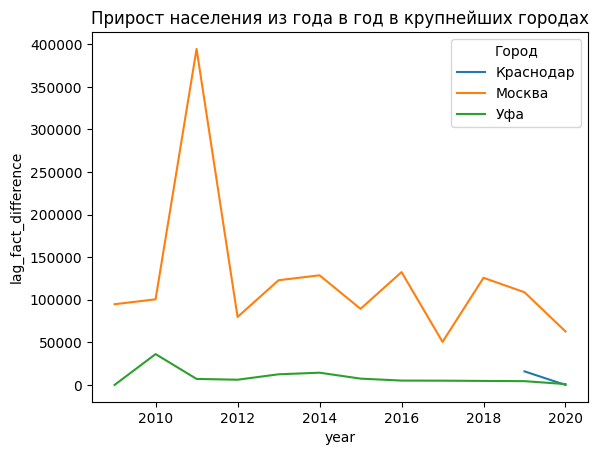

In [145]:
sns.lineplot(x="year", y="lag_fact_difference",
             hue="Город",
             data=data[data['Ранг города'] == 'крупнейший'])
plt.title('Прирост населения из года в год в крупнейших городах')

In [146]:
# вычисление разностей фактического населения в годах по кажому городу
subject_lag_difference = data[~data['fact'].isnull()].groupby(['Название субъекта РФ', 'year'])['fact'].sum().reset_index()
subject_lag_difference['lagged_values'] = subject_lag_difference.groupby(['Название субъекта РФ'])['fact'].shift(1)
subject_lag_difference['lag_fact_difference'] = subject_lag_difference['fact'] - subject_lag_difference['lagged_values']
subject_lag_difference

,Название субъекта РФ,year,fact,lagged_values,lag_fact_difference
0,Алтайский край,2008,"85,235.000",NaN,NaN
1,Алтайский край,2009,"85,235.000","85,235.000",0.000
2,Алтайский край,2010,"85,142.000","85,235.000",-93.000
3,Алтайский край,2011,"84,911.000","85,142.000",-231.000
4,Алтайский край,2012,"84,712.000","84,911.000",-199.000
5,Алтайский край,2013,"85,107.000","84,712.000",395.000
6,Алтайский край,2014,"86,349.000","85,107.000","1,242.000"
7,Алтайский край,2015,"87,695.000","86,349.000","1,346.000"
8,Алтайский край,2016,"88,591.000","87,695.000",896.000
9,Алтайский край,2017,"88,796.000","88,591.000",205.000


C:\Users\kunko.i\AppData\Local\Temp\ipykernel_19824\3991109697.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\kunko.i\AppData\Local\Temp\ipykernel_19824\3991109697.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\kunko.i\AppData\Local\Temp\ipykernel_19824\3991109697.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\kunko.i\AppData\Local\Temp\ipykernel_19824\3991109697.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

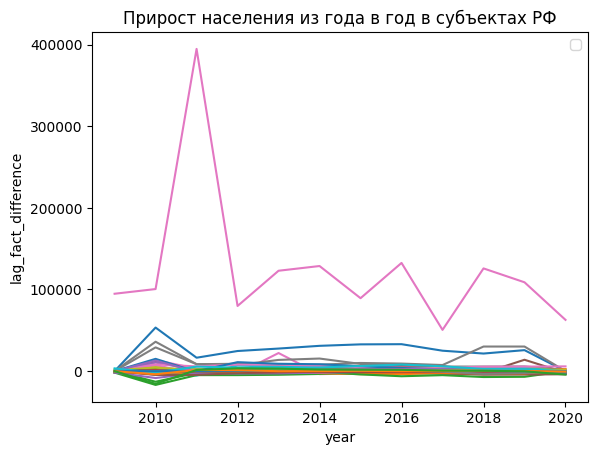

In [147]:
for i in subject_lag_difference['Название субъекта РФ'].unique():
    sns.lineplot(x="year", y="lag_fact_difference",
                 data=subject_lag_difference[subject_lag_difference['Название субъекта РФ'] == i])
    plt.title('Прирост населения из года в год в субъектах РФ')
    plt.legend()


Наблюдаются изменения числа наседеления в большинстве городов в 2010 году

## Выводы
1) Приведённые данные являются неполными для выводов, касающихся страны вцелом или субъекта РФ. Некоторые города, являющиеся столицами субъектов и центрами притока населения, такие как Новосибирск, Екатеринбург и Санкт-Петербург не указаны в данных. Поэтому скорее всего выводы по неполным данным будут неверными, не будут в полной мере отражать социальные тенденции. Мы имеем дело с выборкой случайных городов.
2) в 2010 году прозошло изменение численности насленения в большинстве исследуемых городов. В открытых [источниках](https://cyberleninka.ru/article/n/vnutrennyaya-migratsiya-v-rossii-v-2010-e-gg-makroregionalnye-osobennosti/viewer) указывается прирост миграционной активности с 2010 года в России.
3) в 2011 году пик прироста населения в Москве
4) Чтобы узнать социальные, экономические и политические причины пиков в 2010-2011 годах, необходимы дальнейшие исследования
5) Имеется тенденция прироста населения в крупнейших и крупных городах, уменьшения населения в малых и средних городах.
6) Есть еще одна гипотеза о том, что южные регионы более привлекатеьлны, чем северные, но это будет как идея для дальнейшего исследования